# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS, France
- date   : Juin 16 2016


In [45]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [46]:
print(theNotebook)

MakeLogBook


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [48]:
import pandas as pd

In [49]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [50]:
rootpath_rawimage="../OverScanRemove/trim_images"
MIN_IMGNUMBER=208
MAX_IMGNUMBER=284
object_name='HD205905_May_30th'
SelectTagRe='^trim_20170530_([0-9]+).fits$' # regular expression to select the file
SearchTagRe='^trim_20170530_[0-9]+.fits$'
NBIMGPERLROW=4

In [51]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio30may2017'

In [52]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [53]:
dirlist=[]
dirlist.append(rootpath_rawimage)
dirlist_all=np.array(dirlist)

In [54]:
filelist_all=os.listdir(rootpath_rawimage) 

In [55]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['trim_20170530_058.fits',
 'trim_20170530_059.fits',
 'trim_20170530_060.fits',
 'trim_20170530_061.fits',
 'trim_20170530_062.fits',
 'trim_20170530_063.fits',
 'trim_20170530_064.fits',
 'trim_20170530_065.fits',
 'trim_20170530_066.fits',
 'trim_20170530_067.fits',
 'trim_20170530_068.fits',
 'trim_20170530_069.fits',
 'trim_20170530_070.fits',
 'trim_20170530_071.fits',
 'trim_20170530_072.fits',
 'trim_20170530_073.fits',
 'trim_20170530_074.fits',
 'trim_20170530_075.fits',
 'trim_20170530_076.fits',
 'trim_20170530_077.fits',
 'trim_20170530_078.fits',
 'trim_20170530_079.fits',
 'trim_20170530_080.fits',
 'trim_20170530_081.fits',
 'trim_20170530_082.fits',
 'trim_20170530_083.fits',
 'trim_20170530_084.fits',
 'trim_20170530_085.fits',
 'trim_20170530_086.fits',
 'trim_20170530_087.fits',
 'trim_20170530_088.fits',
 'trim_20170530_089.fits',
 'trim_20170530_090.fits',
 'trim_20170530_091.fits',
 'trim_20170530_092.fits',
 'trim_20170530_093.fits',
 'trim_20170530_094.fits',
 

In [56]:
indexes_files= [] # global list
filelist_fitsimages= []  # global list

In [57]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                    str_index=re.findall(SelectTagRe,filename)
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_fitsimages.append(shortfilename)
                    
    return

In [58]:
MakeFileList()   # Make the list

In [59]:
indexes_files=np.array(indexes_files)
filelist_fitsimages=np.array(filelist_fitsimages)

In [60]:
indexes_files

array([210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284])

In [61]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [62]:
sorted_files=filelist_fitsimages[sorted_indexes]

In [63]:
sorted_numbers=indexes_files[sorted_indexes]

In [64]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(rootpath_rawimage,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [65]:
sorted_filenames=np.array(sorted_filenames)

In [66]:
sorted_filenames

array(['../OverScanRemove/trim_images/trim_20170530_210.fits',
       '../OverScanRemove/trim_images/trim_20170530_211.fits',
       '../OverScanRemove/trim_images/trim_20170530_212.fits',
       '../OverScanRemove/trim_images/trim_20170530_213.fits',
       '../OverScanRemove/trim_images/trim_20170530_214.fits',
       '../OverScanRemove/trim_images/trim_20170530_215.fits',
       '../OverScanRemove/trim_images/trim_20170530_216.fits',
       '../OverScanRemove/trim_images/trim_20170530_217.fits',
       '../OverScanRemove/trim_images/trim_20170530_218.fits',
       '../OverScanRemove/trim_images/trim_20170530_219.fits',
       '../OverScanRemove/trim_images/trim_20170530_220.fits',
       '../OverScanRemove/trim_images/trim_20170530_221.fits',
       '../OverScanRemove/trim_images/trim_20170530_222.fits',
       '../OverScanRemove/trim_images/trim_20170530_223.fits',
       '../OverScanRemove/trim_images/trim_20170530_224.fits',
       '../OverScanRemove/trim_images/trim_20170530_225

In [67]:
from astropy.io import fits
with fits.open(sorted_filenames[0]) as pf:
    print pf[0].header

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2048                                                  NAXIS2  =                 2048                                                  COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H OBJECT  = 'HD205905'           / Name of object observed                        OBSERVER= '        '           / observer                                       PROPID  = '        '           / Proposal ID                                    RECID   = 'ct36.20170531.075438' / NOAO Archibe record ID                       PROPID  = '        '           / Proposal ID                                    IMAGETYP= 'object  '           / Type of

### Build tables for output file

In [68]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []
all_filter1 = []
all_filter2 = []

for idx,file in np.ndenumerate(sorted_filenames):  
    print file
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
   
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    filter1 = header['FILTER1']
    filter2 = header['FILTER2']
    
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)
    all_filter1.append(filter1)
    all_filter2.append(filter2)

    hdu_list.close()
    

../OverScanRemove/trim_images/trim_20170530_210.fits
../OverScanRemove/trim_images/trim_20170530_211.fits
../OverScanRemove/trim_images/trim_20170530_212.fits
../OverScanRemove/trim_images/trim_20170530_213.fits
../OverScanRemove/trim_images/trim_20170530_214.fits
../OverScanRemove/trim_images/trim_20170530_215.fits
../OverScanRemove/trim_images/trim_20170530_216.fits
../OverScanRemove/trim_images/trim_20170530_217.fits
../OverScanRemove/trim_images/trim_20170530_218.fits
../OverScanRemove/trim_images/trim_20170530_219.fits
../OverScanRemove/trim_images/trim_20170530_220.fits
../OverScanRemove/trim_images/trim_20170530_221.fits
../OverScanRemove/trim_images/trim_20170530_222.fits
../OverScanRemove/trim_images/trim_20170530_223.fits
../OverScanRemove/trim_images/trim_20170530_224.fits
../OverScanRemove/trim_images/trim_20170530_225.fits
../OverScanRemove/trim_images/trim_20170530_226.fits
../OverScanRemove/trim_images/trim_20170530_227.fits
../OverScanRemove/trim_images/trim_20170530_22

In [69]:
len(all_airmass)

75

In [70]:
print all_filter2

['Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg', 'Ron400', 'Thor300', 'HoloPhP', 'HoloPhAg', 'HoloAmAg']


## Build outputfile

In [71]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)
col_filter1=np.array(all_filter1)
col_filter2=np.array(all_filter2)

In [72]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=sorted_filenames)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 
c13 = fits.Column(name='filter1', format='A20', array=col_filter1)
c14 = fits.Column(name='filter2', format='A20', array=col_filter2) 

In [73]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12,c13,c14])

In [74]:
tbhdu.writeto(logfile,overwrite=True)

## Convert into Table
---------------------------

In [75]:
thetable= Table(tbhdu.data)

In [76]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2
0,210,1.101,2017-05-31T07:54:38.806,../OverScanRemove/trim_images/,60.0,24.717,9.5,782.0,23.0,11.6,0.793,dia,Ron400
1,211,1.097,2017-05-31T07:56:31.293,../OverScanRemove/trim_images/,60.0,24.311,9.4,782.0,24.0,11.5,0.793,dia,Thor300
2,212,1.094,2017-05-31T07:58:23.653,../OverScanRemove/trim_images/,60.0,23.905,9.5,782.0,24.0,10.5,0.793,dia,HoloPhP
3,213,1.09,2017-05-31T08:00:16.053,../OverScanRemove/trim_images/,120.0,23.499,9.7,782.0,23.0,12.0,0.793,dia,HoloPhAg
4,214,1.085,2017-05-31T08:03:08.495,../OverScanRemove/trim_images/,120.0,22.877,9.6,782.0,23.0,13.4,0.793,dia,HoloAmAg
5,215,1.08,2017-05-31T08:06:00.847,../OverScanRemove/trim_images/,60.0,22.254,9.6,782.0,23.0,15.4,0.793,dia,Ron400
6,216,1.077,2017-05-31T08:07:53.254,../OverScanRemove/trim_images/,60.0,21.848,9.8,782.0,23.0,10.6,0.793,dia,Thor300
7,217,1.074,2017-05-31T08:09:45.655,../OverScanRemove/trim_images/,60.0,21.442,9.8,782.0,23.0,10.8,0.793,dia,HoloPhP
8,218,1.071,2017-05-31T08:11:37.854,../OverScanRemove/trim_images/,120.0,21.037,9.6,782.0,23.0,12.5,0.793,dia,HoloPhAg
9,219,1.067,2017-05-31T08:14:30.301,../OverScanRemove/trim_images/,120.0,20.415,9.7,782.0,23.0,14.0,0.793,dia,HoloAmAg


## Read the logfile into a Table
---------------------------------------

In [77]:
t = Table.read(logfile)

In [78]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32,str20,str20
210,1.101,2017-05-31T07:54:38.806,../OverScanRemove/trim_images/,60.0,24.717,9.5,782.0,23.0,11.6,0.793,dia,Ron400
211,1.097,2017-05-31T07:56:31.293,../OverScanRemove/trim_images/,60.0,24.311,9.4,782.0,24.0,11.5,0.793,dia,Thor300
212,1.094,2017-05-31T07:58:23.653,../OverScanRemove/trim_images/,60.0,23.905,9.5,782.0,24.0,10.5,0.793,dia,HoloPhP
213,1.09,2017-05-31T08:00:16.053,../OverScanRemove/trim_images/,120.0,23.499,9.7,782.0,23.0,12.0,0.793,dia,HoloPhAg
214,1.085,2017-05-31T08:03:08.495,../OverScanRemove/trim_images/,120.0,22.877,9.6,782.0,23.0,13.4,0.793,dia,HoloAmAg
215,1.08,2017-05-31T08:06:00.847,../OverScanRemove/trim_images/,60.0,22.254,9.6,782.0,23.0,15.4,0.793,dia,Ron400
216,1.077,2017-05-31T08:07:53.254,../OverScanRemove/trim_images/,60.0,21.848,9.8,782.0,23.0,10.6,0.793,dia,Thor300
217,1.074,2017-05-31T08:09:45.655,../OverScanRemove/trim_images/,60.0,21.442,9.8,782.0,23.0,10.8,0.793,dia,HoloPhP
218,1.071,2017-05-31T08:11:37.854,../OverScanRemove/trim_images/,120.0,21.037,9.6,782.0,23.0,12.5,0.793,dia,HoloPhAg


## Convert into pandas to plot
---------------------------------------

In [79]:
df = t.to_pandas()

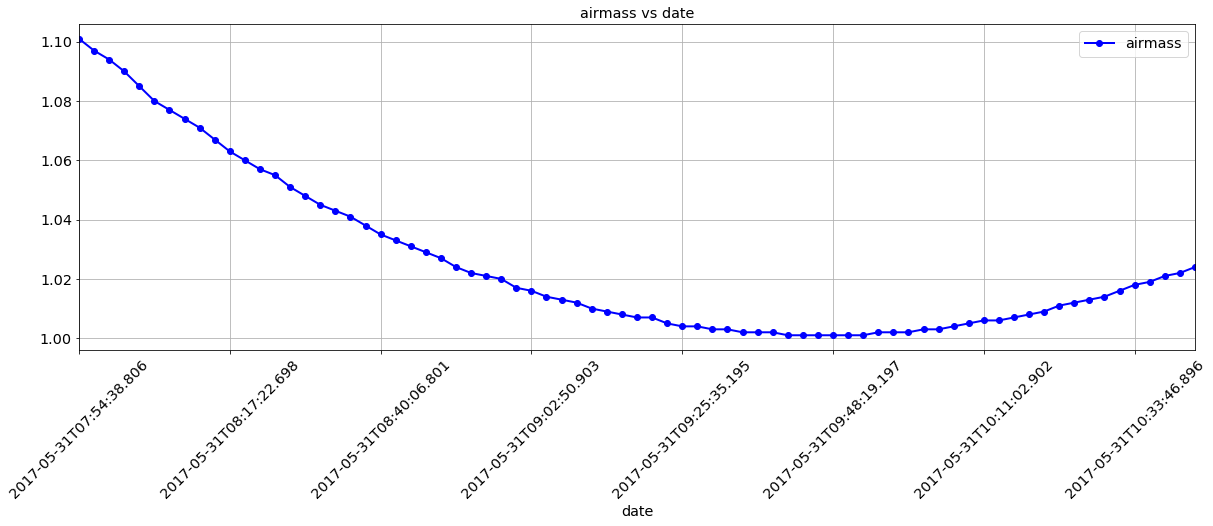

In [80]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',marker='o',linewidth=2)


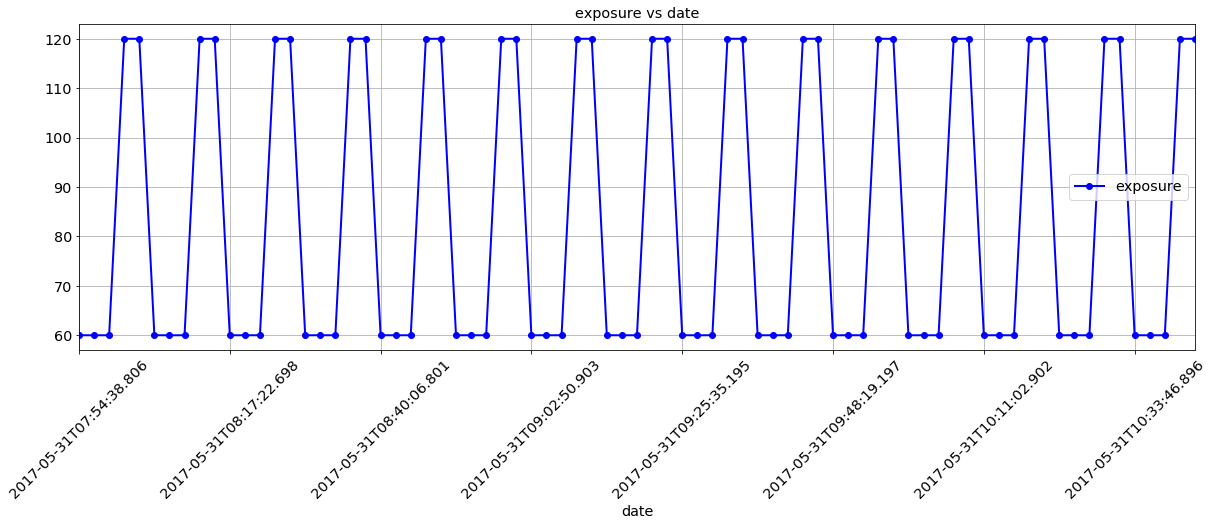

In [81]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',marker='o',linewidth=2)

### Save pandas file


In [82]:
df.to_csv(pandaslogfile)